In [1]:
import numpy as np 
import pandas as pd
import random as rd 
import datetime 
import matplotlib.pyplot as plt
import seaborn as sns 

In [61]:
brand = pd.read_csv("./brand_keyword_cnt.csv")
re = brand
train=pd.read_csv("./train.csv").drop(columns=['제품','ID', '대분류', '중분류', '소분류'])

In [62]:
# 두 번째 열부터 모든 값이 0인 행을 제거
train_cleaned = train[~(train.iloc[:, 1:] == 0).all(axis=1)]
train_cleaned.head(10)
'''
train.drop(train[train.iloc[:, 1:].eq(0).all(axis=1)].index, inplace=True)
print(train)
'''

'\ntrain.drop(train[train.iloc[:, 1:].eq(0).all(axis=1)].index, inplace=True)\nprint(train)\n'

In [63]:
print(train['브랜드'])

0        B002-00001
1        B002-00002
2        B002-00002
3        B002-00002
4        B002-00003
            ...    
15885    B002-03799
15886    B002-03799
15887    B002-03799
15888    B002-03799
15889    B002-03799
Name: 브랜드, Length: 15890, dtype: object


In [64]:
brand_range = [f'B002-000{i:02d}' for i in range(1, 101)]

re_t = train[train['브랜드'].isin(brand_range)]
print(re_t['브랜드'])

0      B002-00001
1      B002-00002
2      B002-00002
3      B002-00002
4      B002-00003
          ...    
349    B002-00098
350    B002-00098
351    B002-00098
352    B002-00098
353    B002-00099
Name: 브랜드, Length: 354, dtype: object


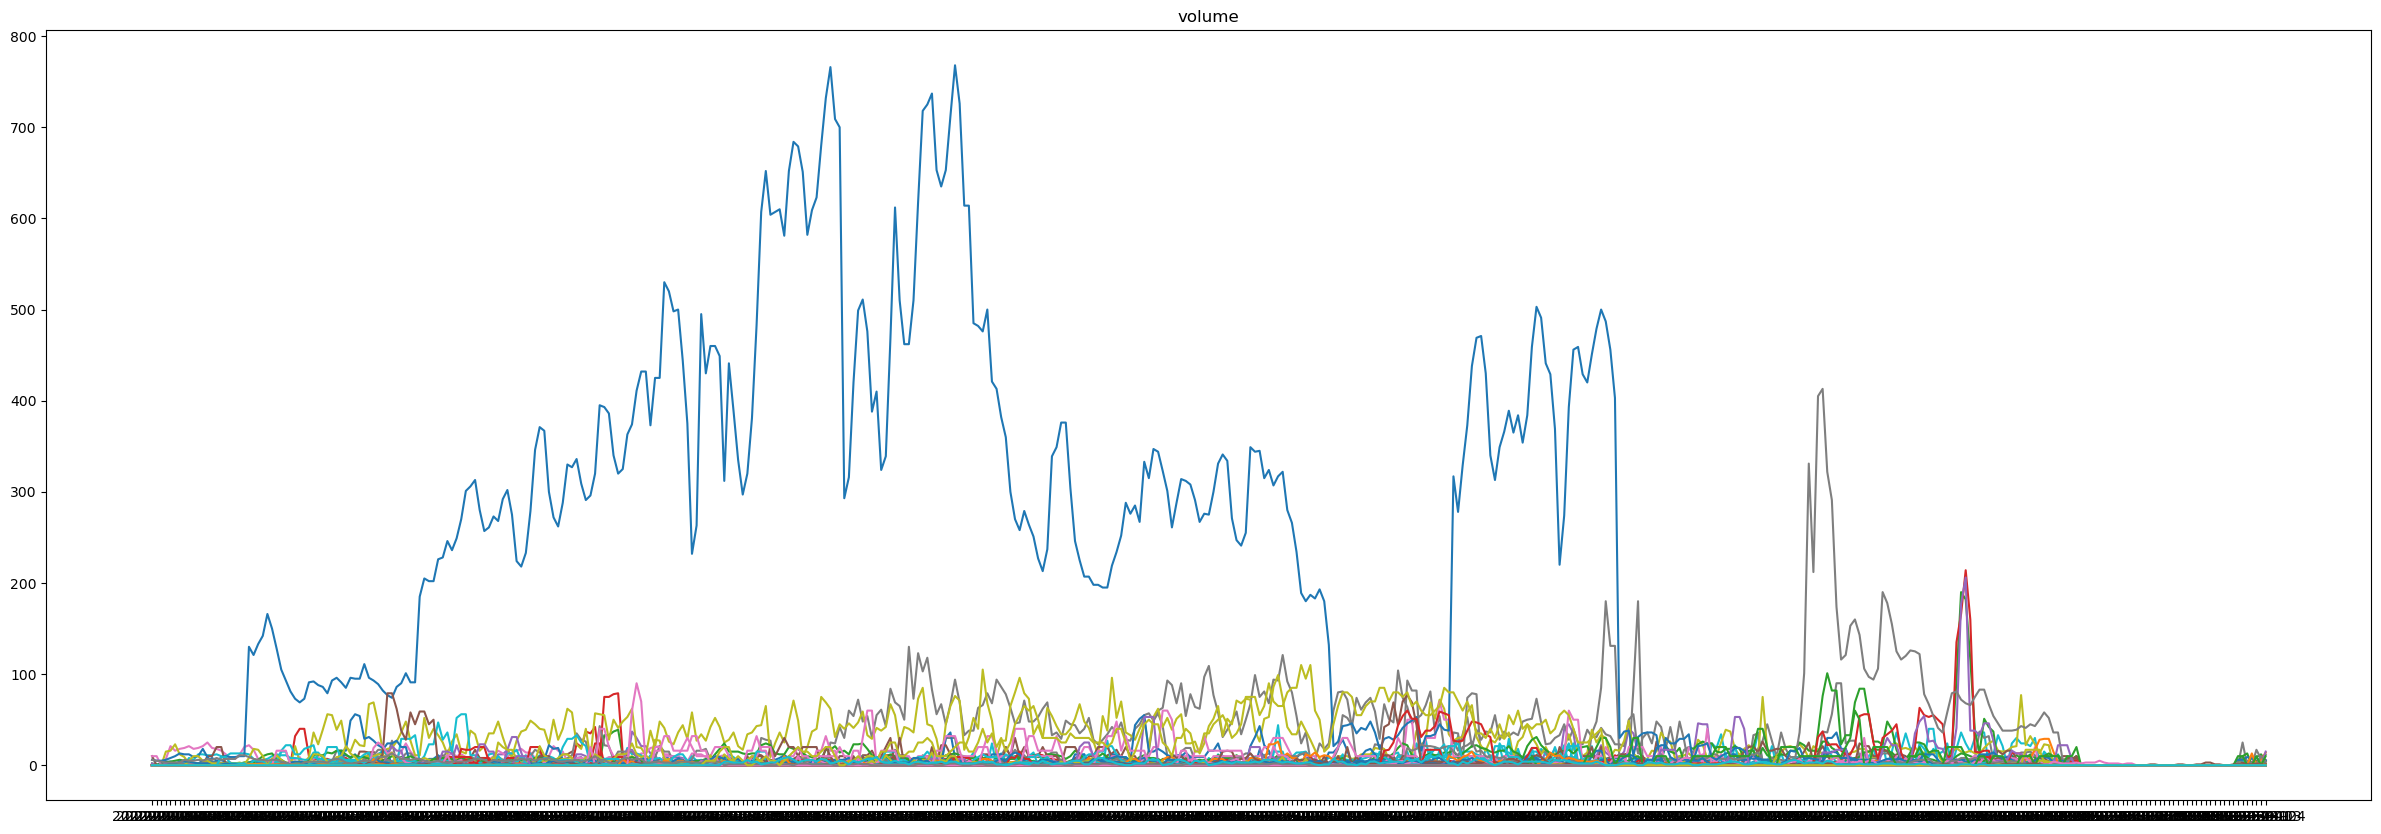

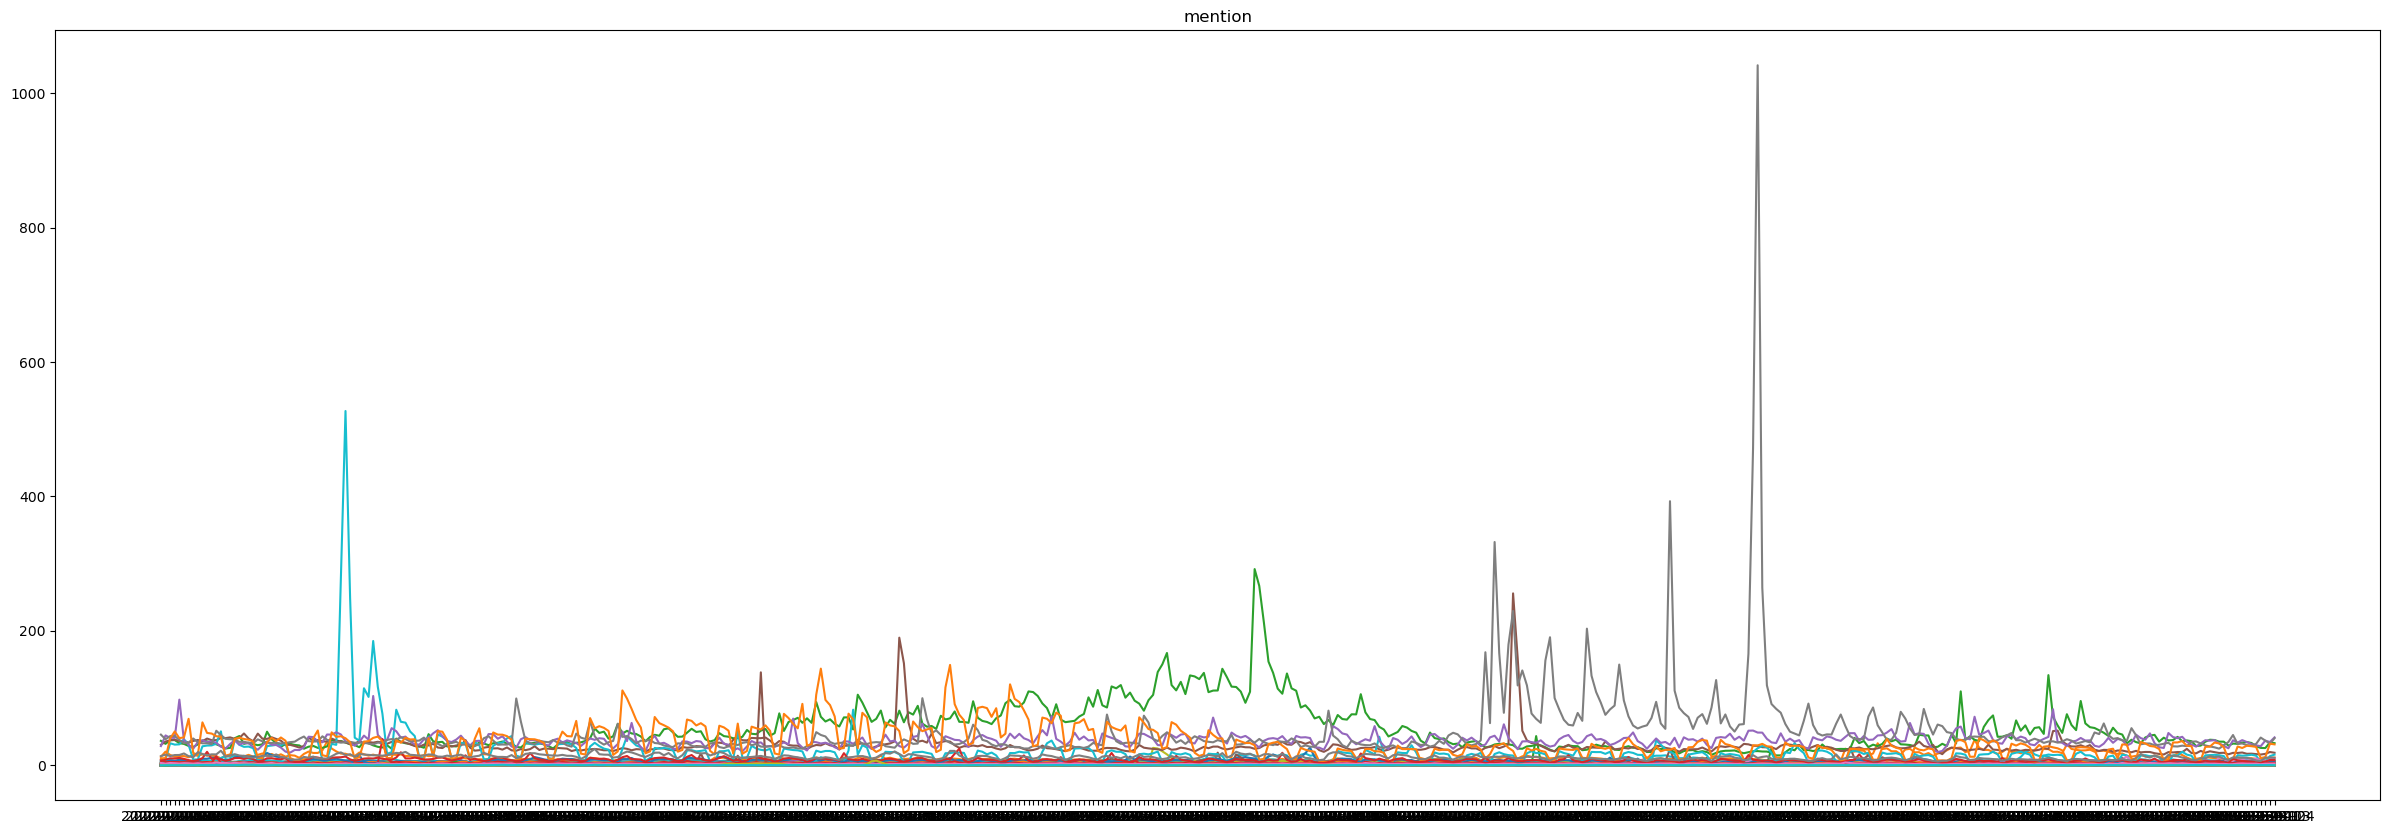

In [41]:
# 첫 번째 그래프
plt.figure(figsize=(30, 10))
plt.title('volume')
for i in range(0, 100):
    brand_name = re_t.iloc[i, 0]  
    plt.plot(re_t.columns[1:], re_t.iloc[i, 1:], label=brand_name)

#plt.legend()  
plt.show()

# 두 번째 그래프
plt.figure(figsize=(30, 10))
plt.title('mention')
for i in range(0, 100):
    brand_name = brand.iloc[i, 0]  
    plt.plot(brand.columns[1:], brand.iloc[i, 1:], label=brand_name)

#plt.legend() 
plt.show()

# 브랜드별로 하나씩 나타낸 것도 아니고(train데이터에 brand 중복되는것들이 있어서) + 너무 많아서 의미 없음

# B002-00001

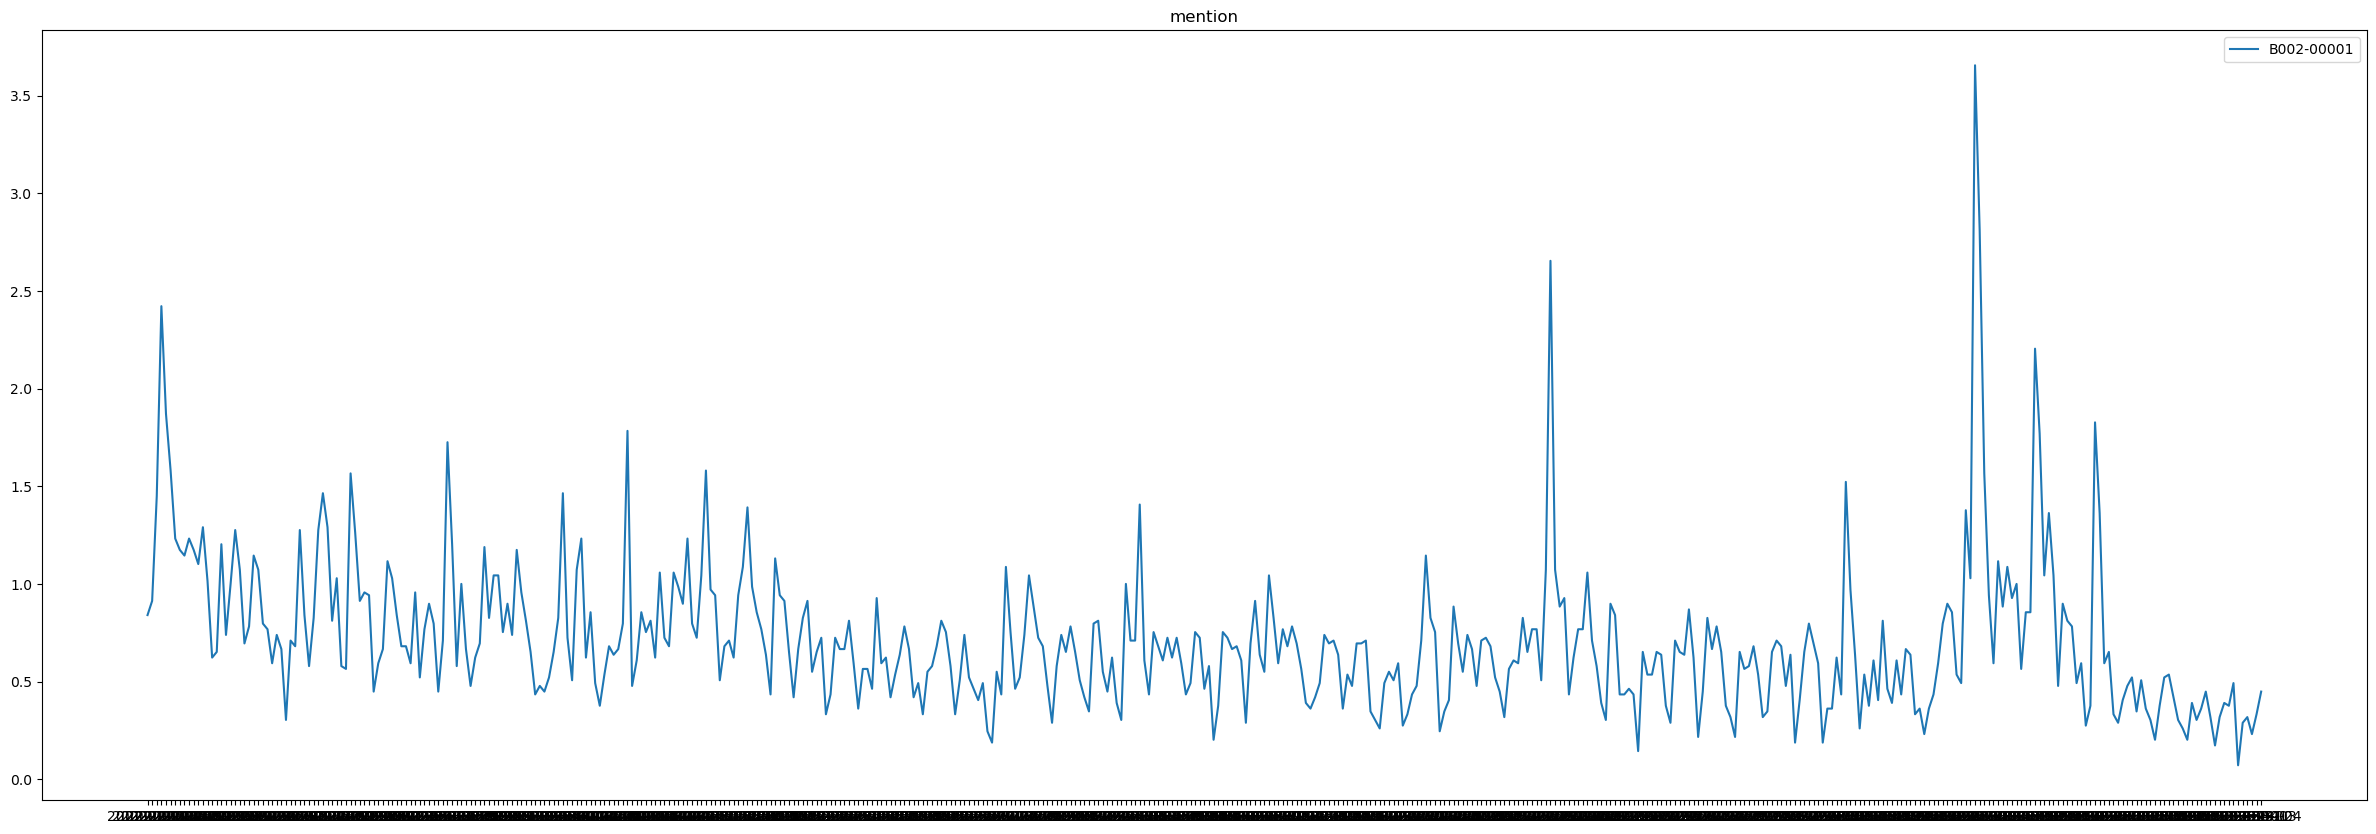

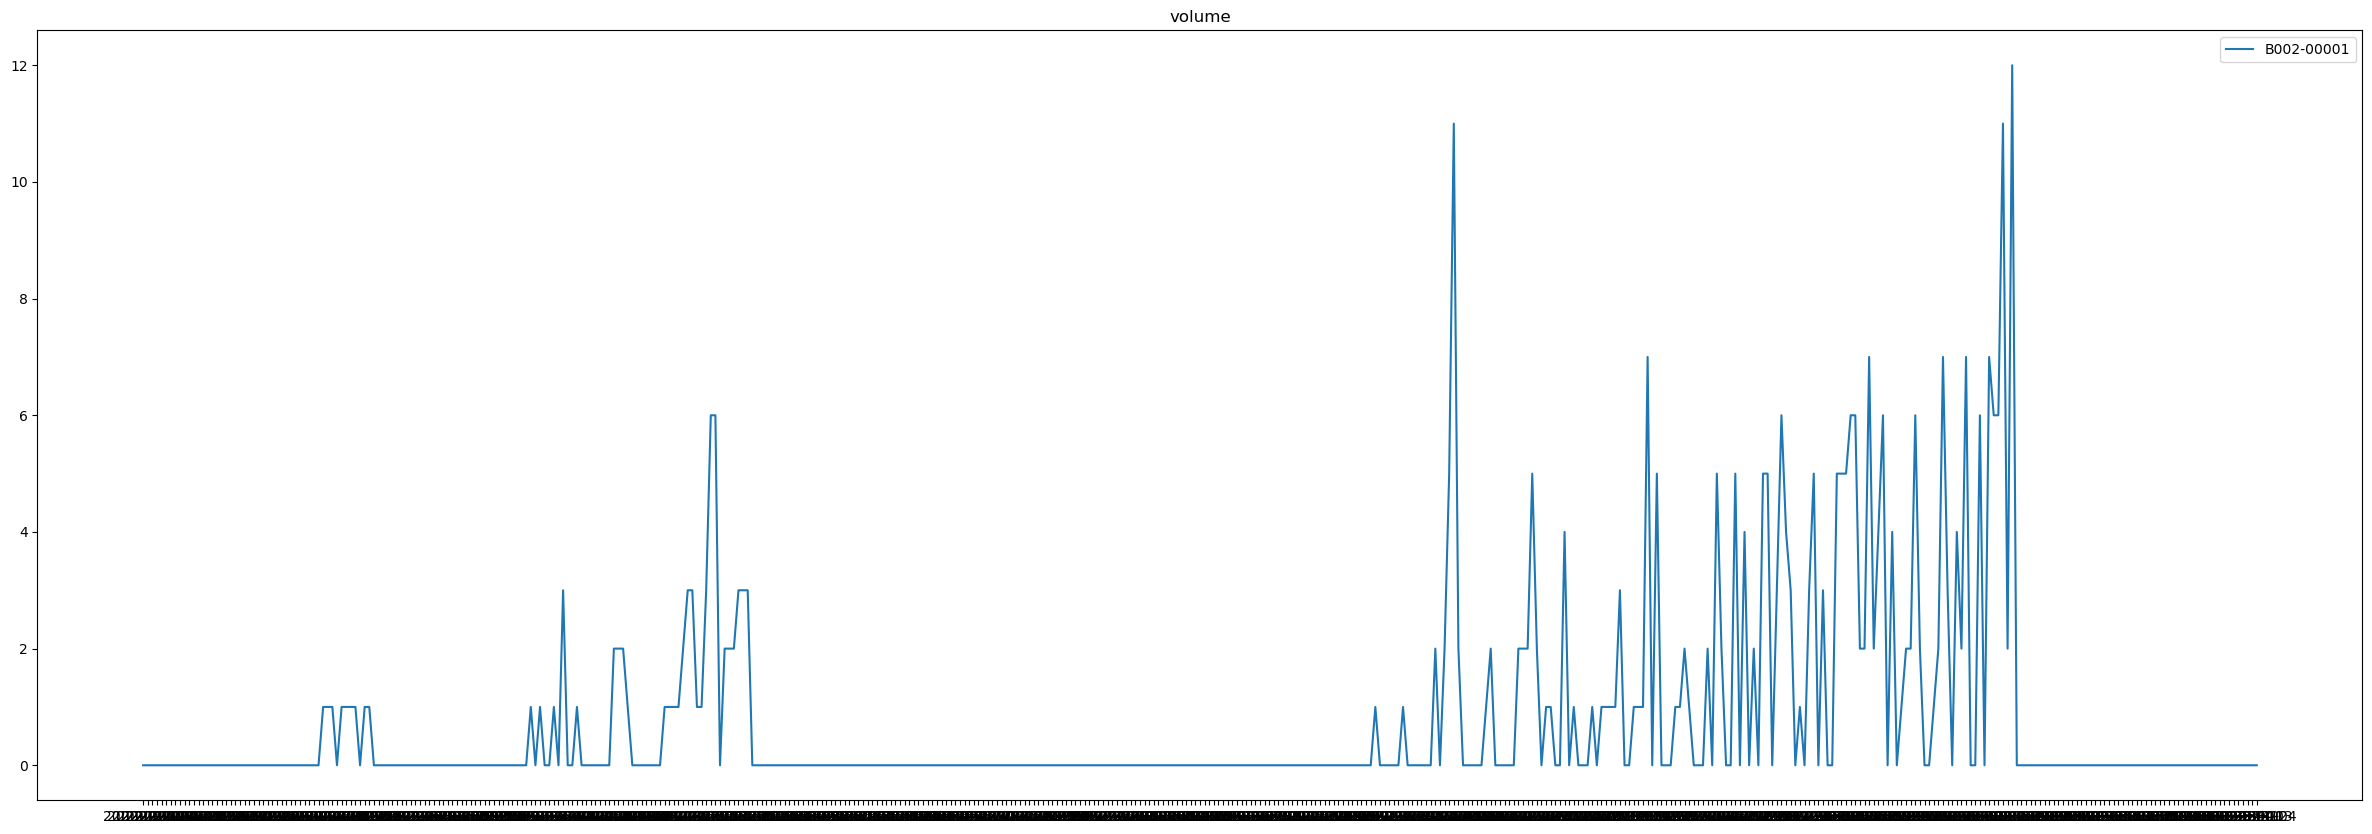

In [44]:
plt.figure(figsize=(30, 10))
plt.title('mention')
brand_name = brand.iloc[0, 0]  
plt.plot(brand.columns[1:], brand.iloc[0, 1:], label=brand_name)  
plt.legend() 
plt.show()

plt.figure(figsize=(30, 10))
plt.title('volume')
brand_name = re_t.iloc[0, 0]  
plt.plot(re_t.columns[1:], re_t.iloc[0, 1:], label=brand_name)  
plt.legend()
plt.show()

# B002-00002

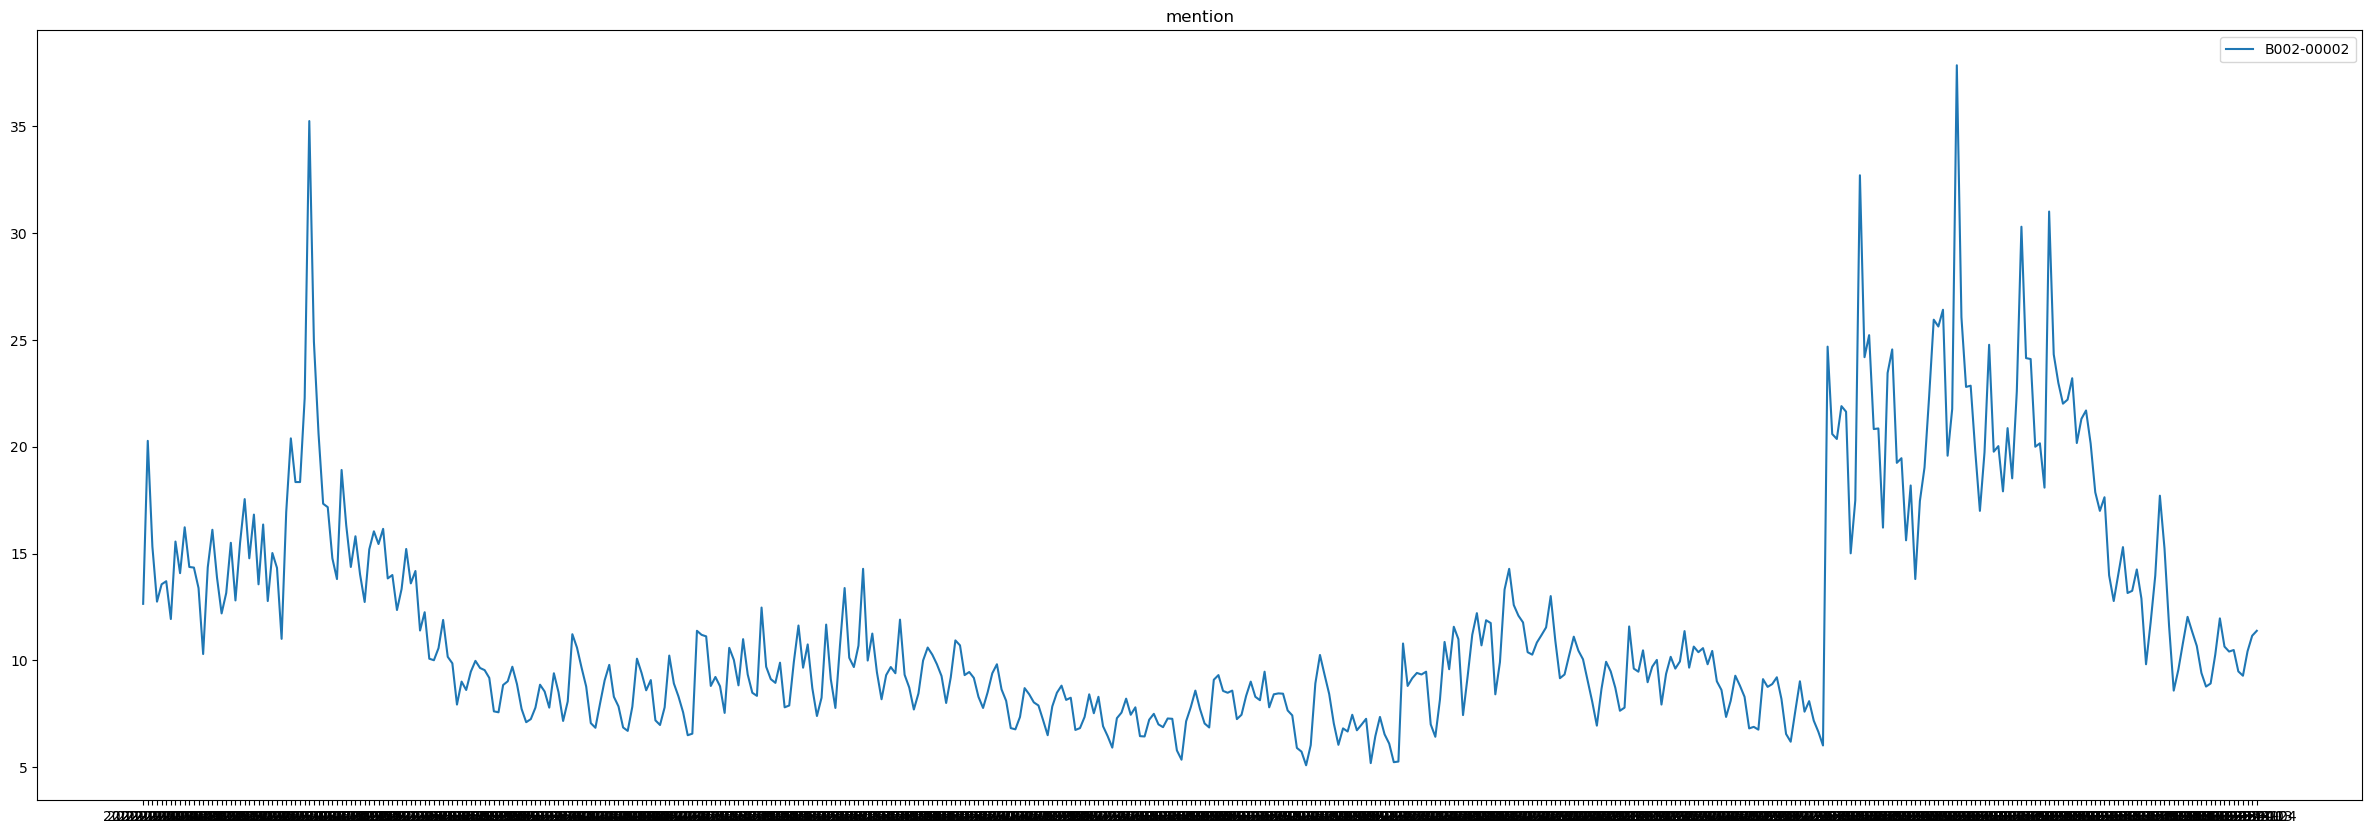

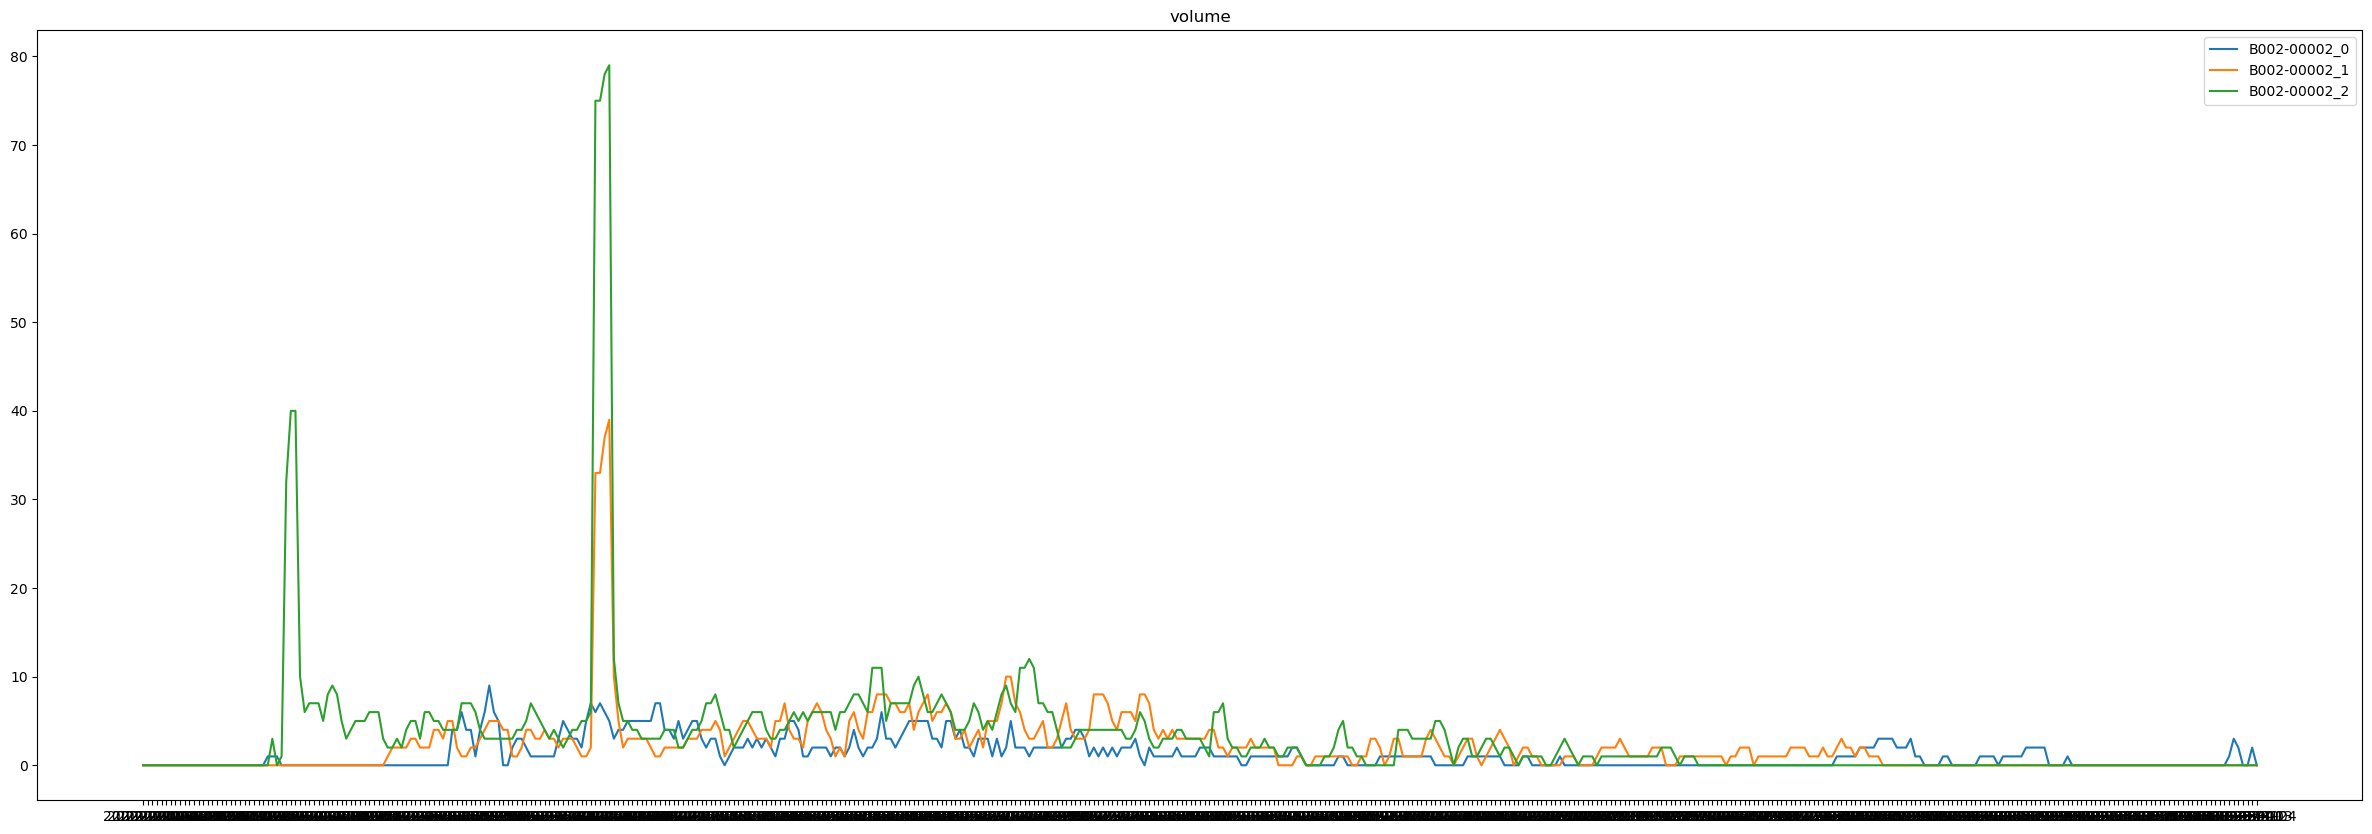

In [53]:
plt.figure(figsize=(30, 10))
plt.title('mention')
brand_name = 'B002-00002'
brand_data = brand.loc[brand['브랜드'] == brand_name]  # 수정된 부분
plt.plot(brand_data.columns[1:], brand_data.iloc[0, 1:], label=brand_name)
plt.legend() 
plt.show()

plt.figure(figsize=(30, 10))
plt.title('volume')
brand_name = 'B002-00002'
brand_data = re_t.loc[re_t['브랜드'] == brand_name]
for i in range(len(brand_data)):
    plt.plot(brand_data.columns[1:], brand_data.iloc[i, 1:], label=f"{brand_name}_{i}")
plt.legend()
plt.show()

## 2022-01만

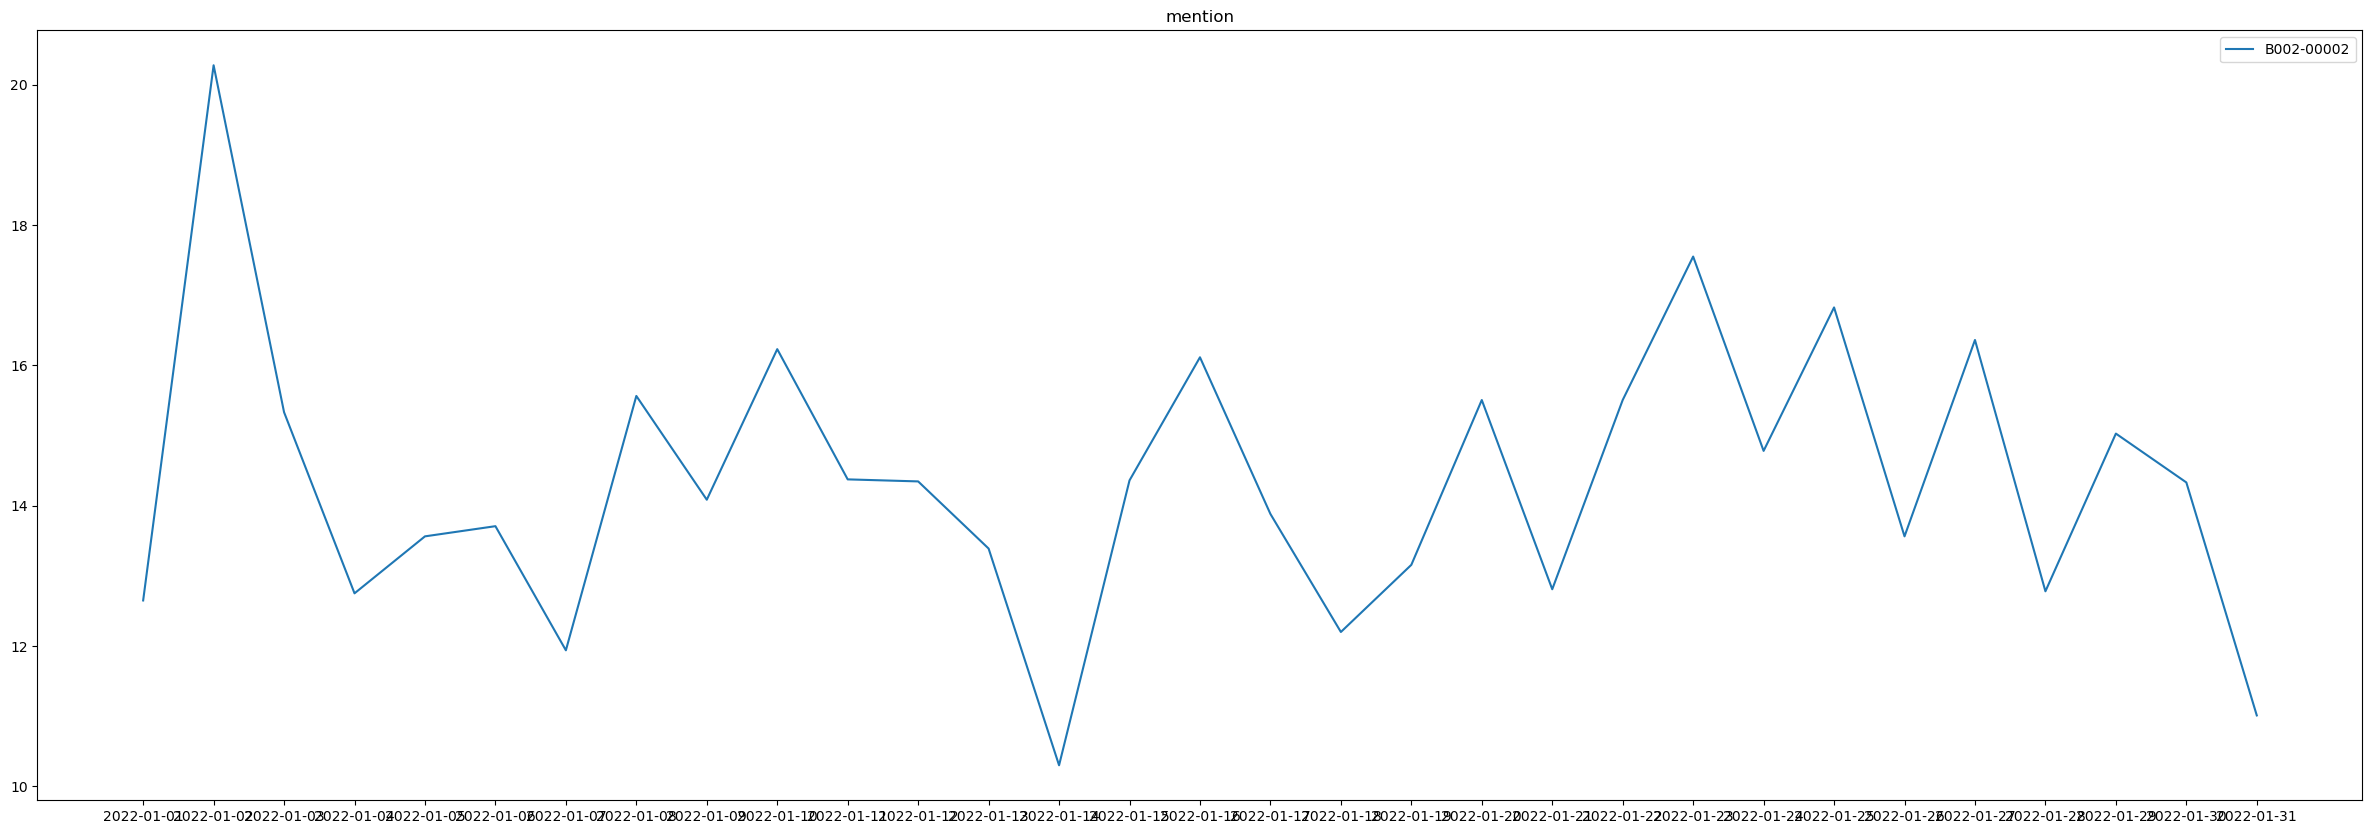

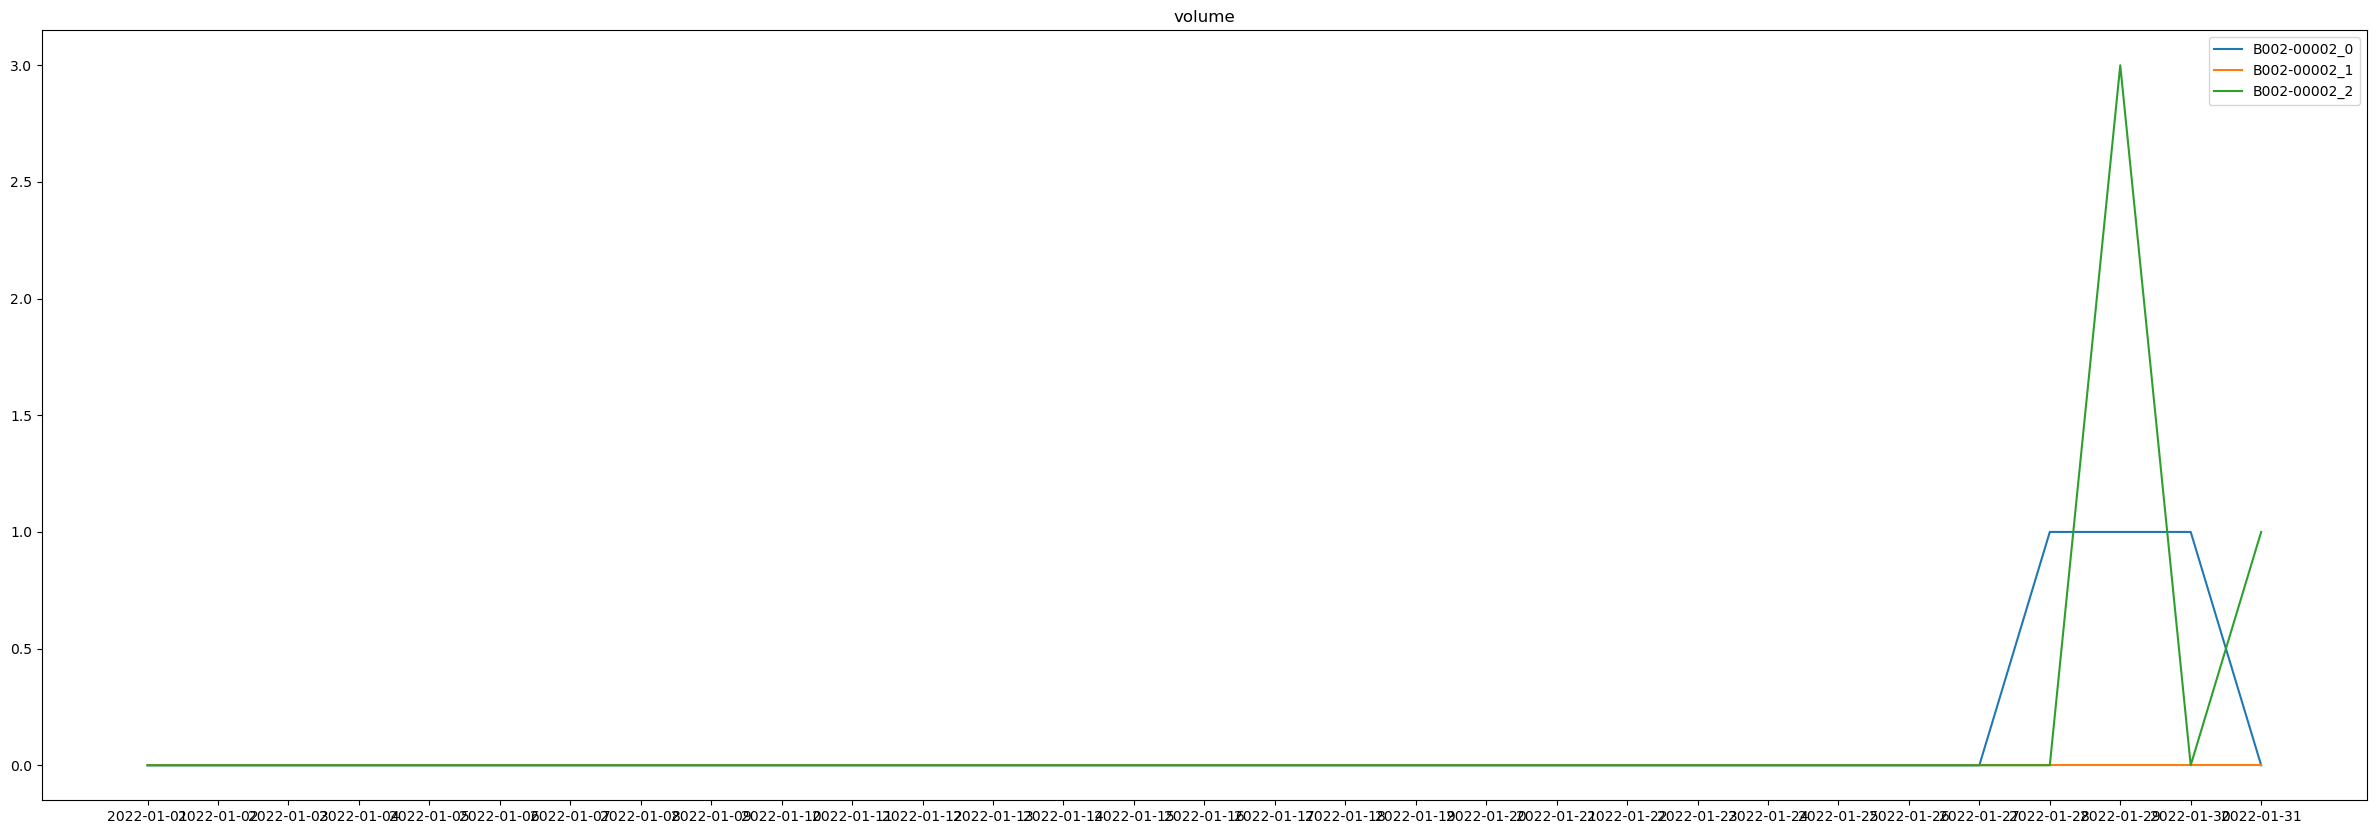

In [58]:
plt.figure(figsize=(30, 10))
plt.title('mention')
brand_name = 'B002-00002'
brand_data = brand.loc[brand['브랜드'] == brand_name]
dates = brand_data.columns[1:32]  
plt.plot(dates, brand_data.iloc[0, 1:32], label=brand_name)  
plt.legend() 
plt.show()

plt.figure(figsize=(30, 10))
plt.title('volume')
brand_name = 'B002-00002'
brand_data = re_t.loc[re_t['브랜드'] == brand_name]
for i in range(len(brand_data)):
    plt.plot(dates, brand_data.iloc[i, 1:32], label=f"{brand_name}_{i}")  
plt.legend()
plt.show()


## 2022_1월 Rolling Meand & sd

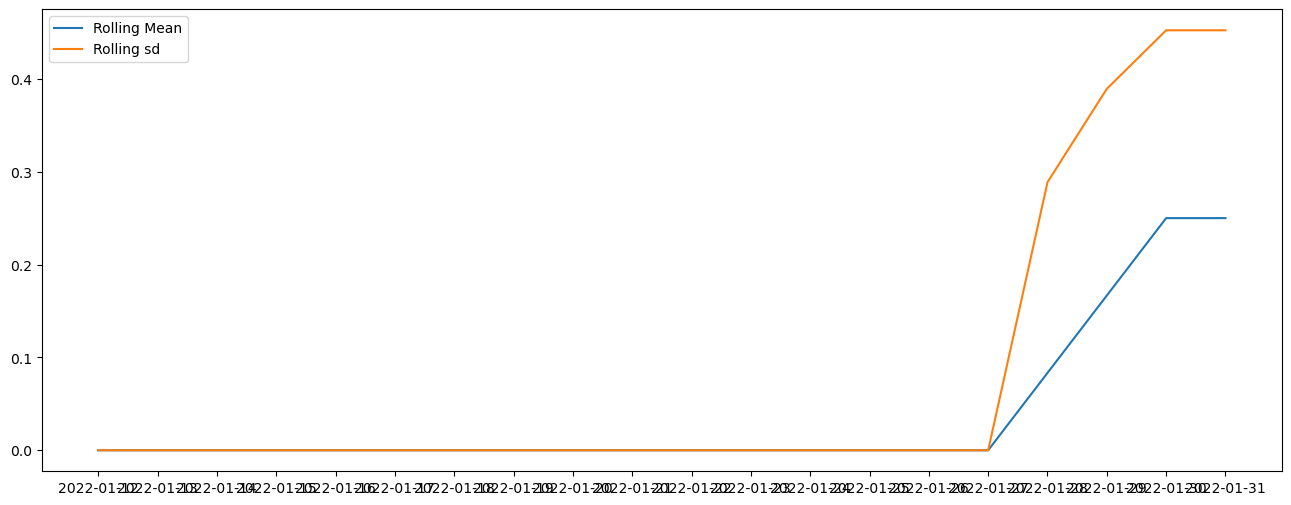

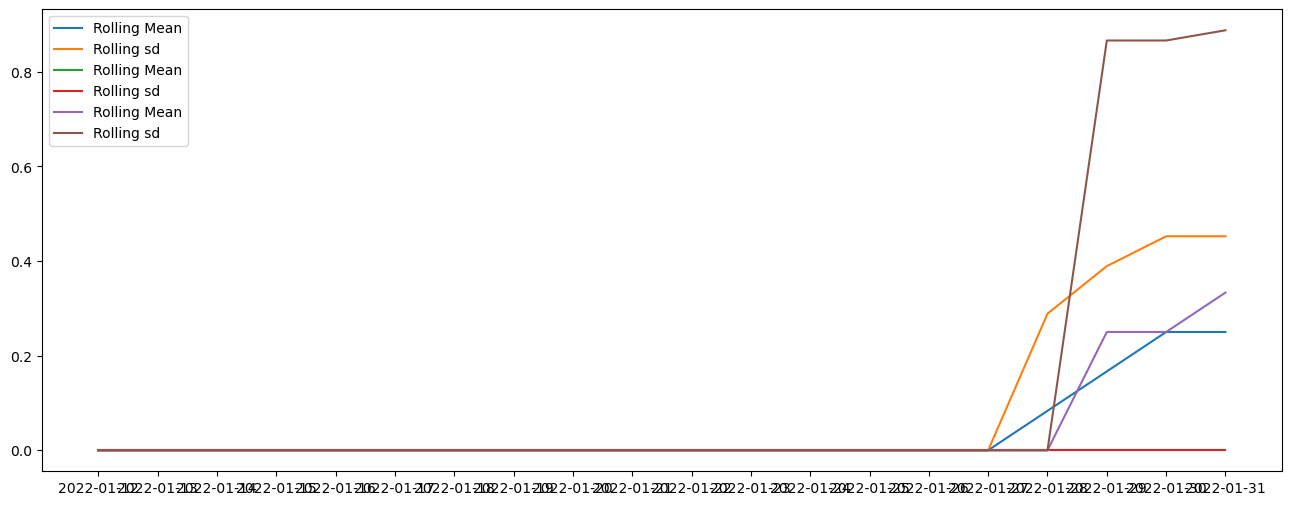

In [60]:
plt.figure(figsize=(16,6))
plt.plot(dates, brand_data.iloc[0, 1:32].rolling(window=12,center=False).mean(),label='Rolling Mean')
plt.plot(dates, brand_data.iloc[0, 1:32].rolling(window=12,center=False).std(),label='Rolling sd')
plt.legend()
plt.show()

plt.figure(figsize=(16,6))
for i in range(len(brand_data)):
    plt.plot(dates, brand_data.iloc[i, 1:32].rolling(window=12,center=False).mean(),label='Rolling Mean')
    plt.plot(dates, brand_data.iloc[i, 1:32].rolling(window=12,center=False).std(),label='Rolling sd')
plt.legend()
plt.show()

In [66]:
## 100개 Rolling Meand & sd

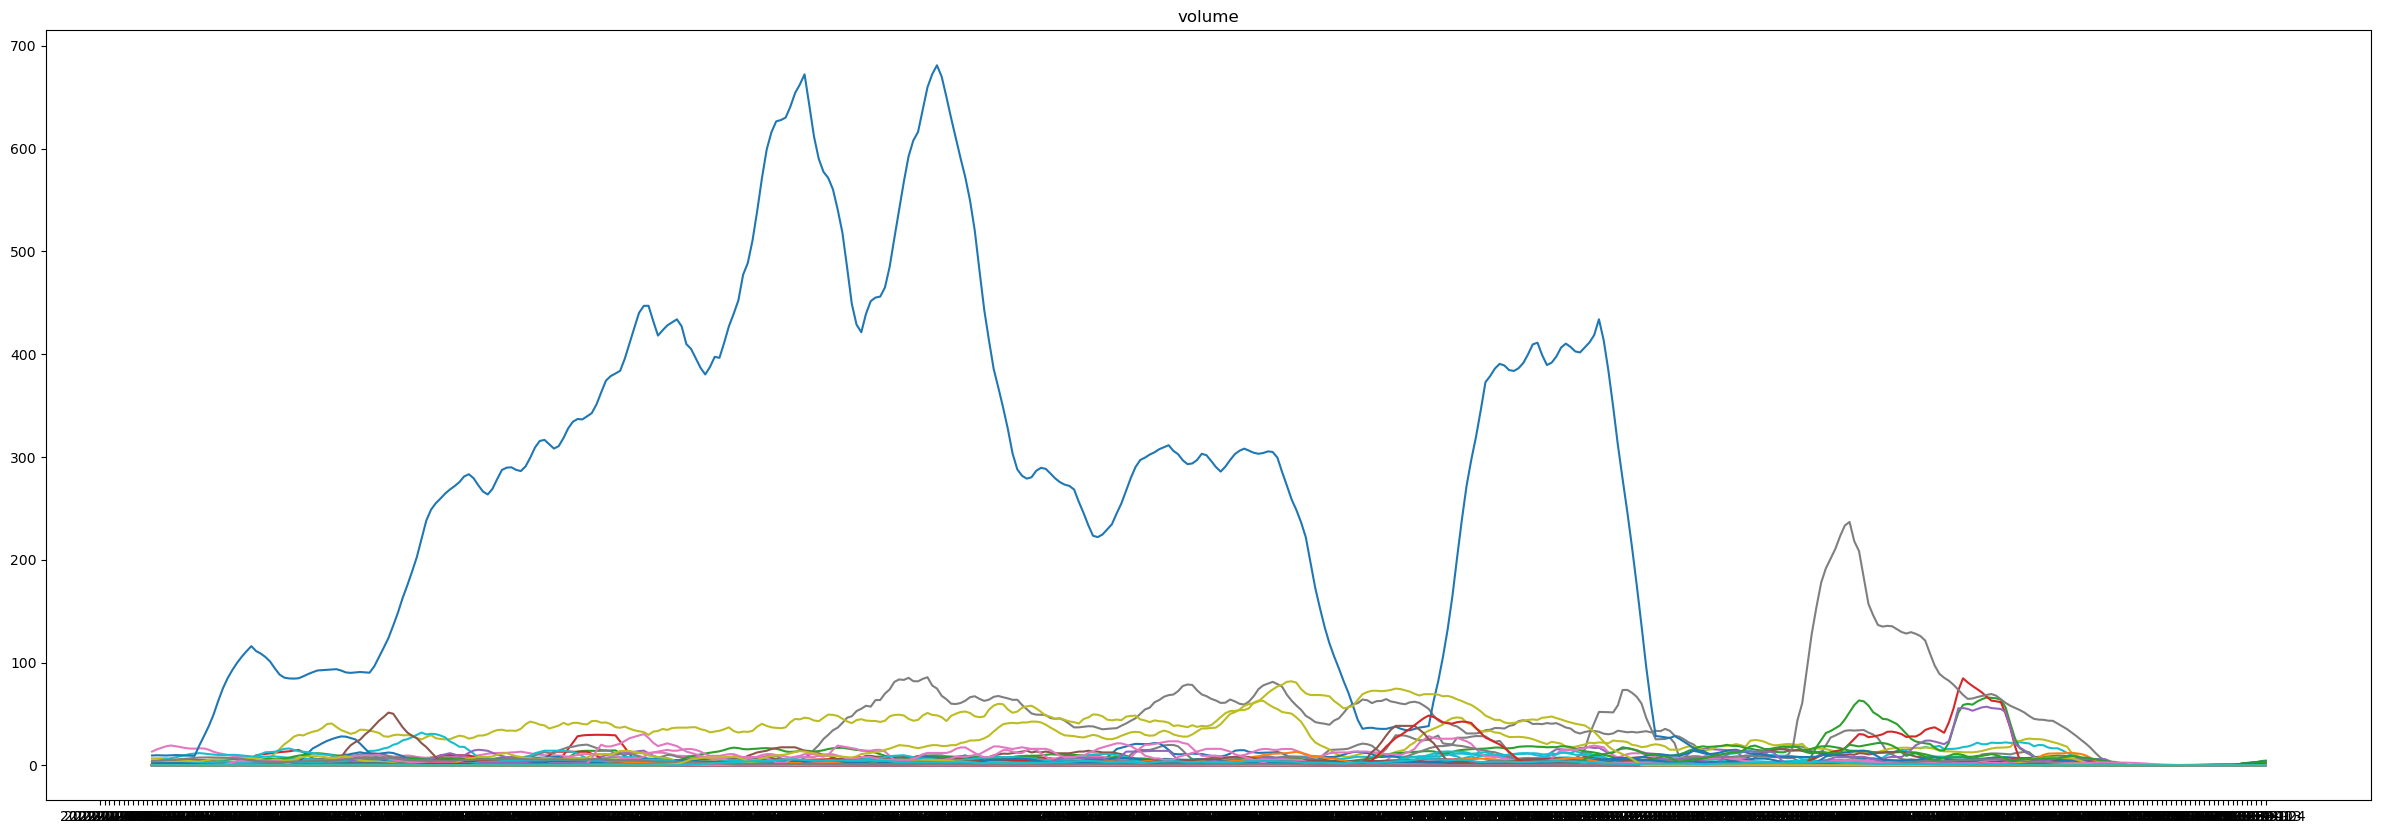

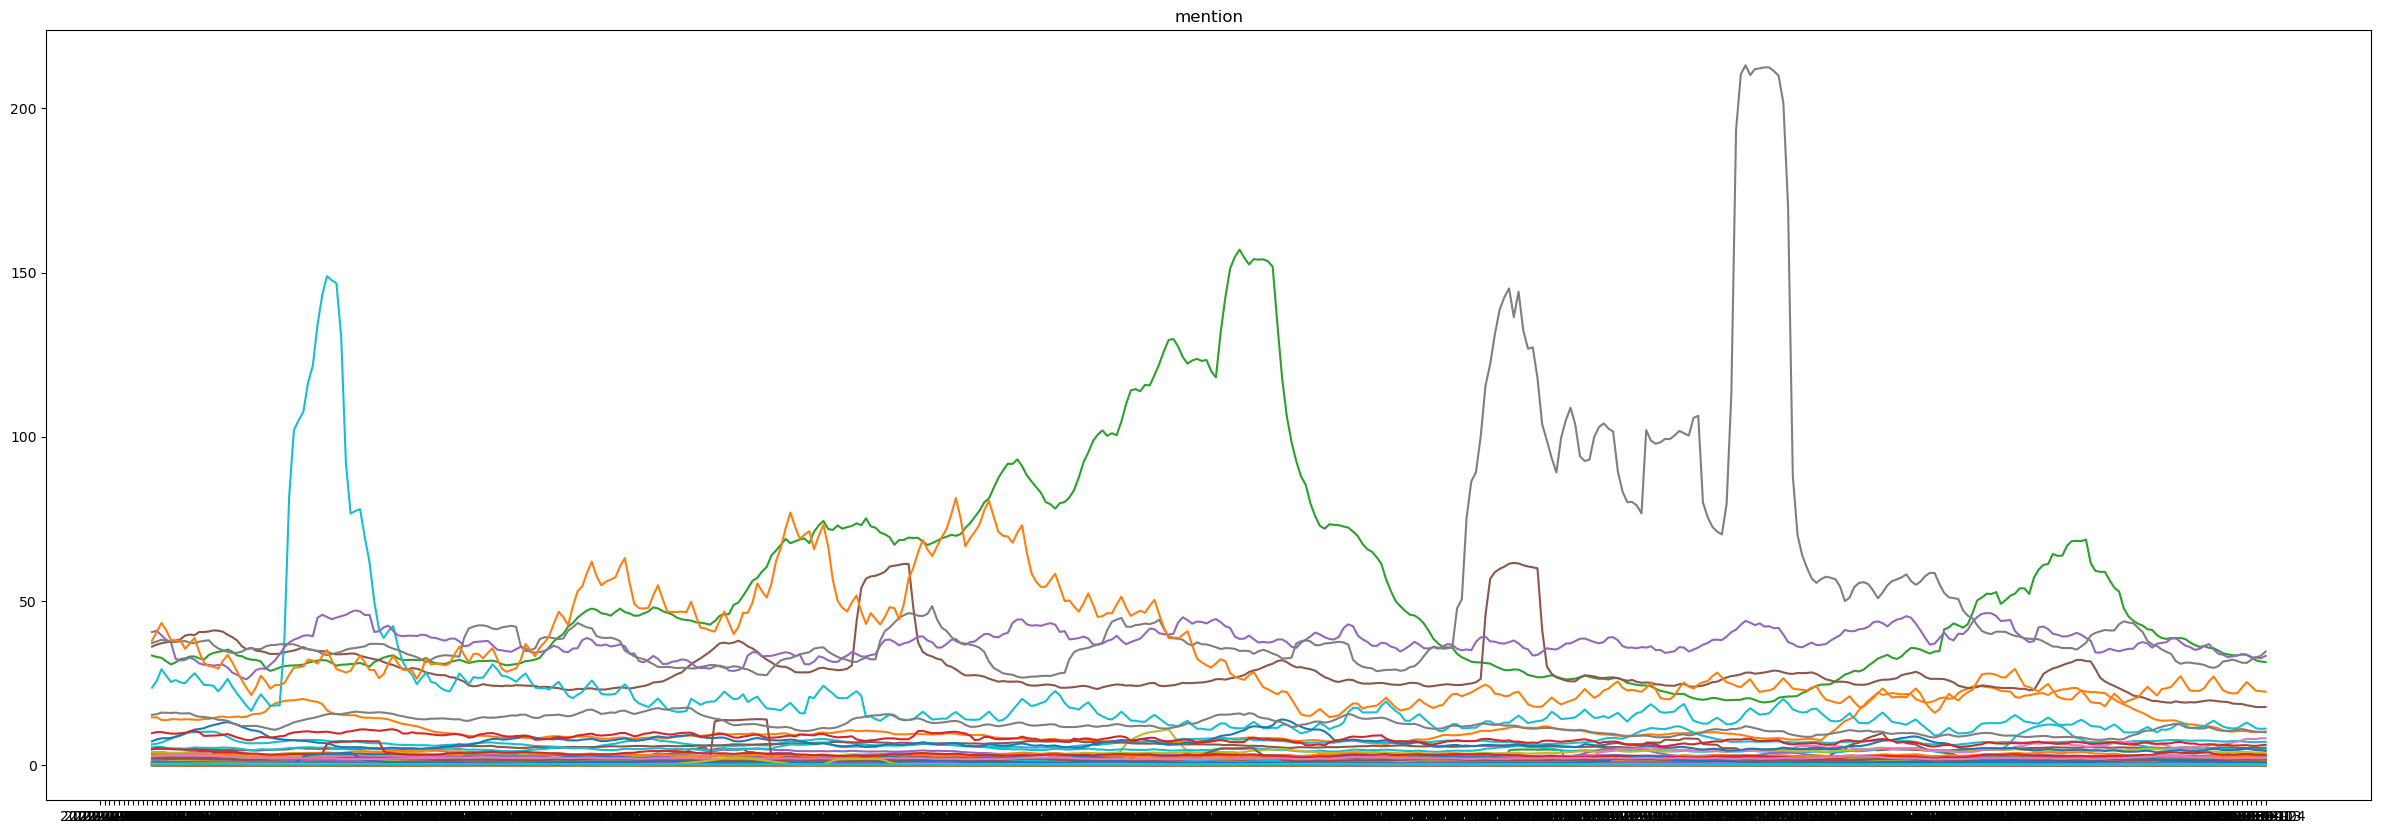

In [67]:
plt.figure(figsize=(30, 10))
plt.title('volume')
for i in range(0, 100):
    brand_name = re_t.iloc[i, 0]  
    plt.plot(re_t.columns[1:], re_t.iloc[i, 1:].rolling(window=12,center=False).mean(),label='Rolling Mean')

#plt.legend()  
plt.show()

plt.figure(figsize=(30, 10))
plt.title('mention')
for i in range(0, 100):
    brand_name = brand.iloc[i, 0]  
    plt.plot(brand.columns[1:], brand.iloc[i, 1:].rolling(window=12,center=False).mean(),label='Rolling Mean')

#plt.legend() 
plt.show()

# 주어진 데이터셋을 어떻게 나눠서(브랜드별/제품별 등) 유의미한 데이터를 얻을 수 있을지..?